# Group Assignment: Oxnard and Building Types Near Sites of Toxic Releases# Midterm Presentation: Oxnard and Sites of Toxic Releases

### Antonia Izuogu

In [1]:
#general data wrangling tasks
import pandas as pd

#read and visualize spatial data
import geopandas as gpd

#providing basemaps
import contextily as ctx

#give power to plots
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Plot Map of Toxic Release Facilities

In [2]:
#name dataset as pd and read/show dataset
dfox=pd.read_csv('updatedoxnard_trisummary2020 - Sheet1-5.csv')

In [3]:

# convert df to gdf
gdfox = gpd.GeoDataFrame(dfox, crs='epsg:4326', geometry=gpd.points_from_xy(dfox.Longitude, dfox.Latitude)) 
#geometry put the longitude and latitide points together in new column as object types
gdfox

,Longitude,Latitude,Name,Address,Industry Sector,Releases (lb),Releases (lb) Mean,geometry
0,-119.183020,34.140350,New-Indy Oxnard LLC,"5936 Perkins Road, Oxnard, CA 93033",Paper,"10,001-100,000",55000.5,POINT (-119.18302 34.14035)
1,-119.168445,34.141707,Aluminum Precision Products INC,"1001 MC Wane Bouvelard, Oxnard, CA 93033",Fabricated Metals,"101-10,000",5050.5,POINT (-119.16845 34.14171)
2,-119.168110,34.196130,Cemex Oxnard Plant,"548 Diaz Avenue, Oxnard, CA 93030",Nonmetallic Mineral Product,0.00,0.0,POINT (-119.16811 34.19613)
3,-119.147180,34.198100,Parker Hannifin Corp,"2340 Eastman Ave, Oxnard, CA 93030",Machinery,"10,001-100,000",55000.5,POINT (-119.14718 34.19810)
4,-119.130352,34.205928,PTI Technologies Inc,"501 N Del Norte Boulevard, Oxnard, CA 93030",Transportation Equipment,"101-10,000",5050.5,POINT (-119.13035 34.20593)
5,-119.140427,34.209468,The Procter & Gamble Paper Product CO,"800 N Rice Avenue, Oxnard, CA 93030",Paper,"101-10,000",5050.5,POINT (-119.14043 34.20947)
6,-119.163291,34.249140,Southern Counties Oil CO LP DBA SC Fuels,"3815 East Vineyard Avenue, Oxnard, CA 93036",Petroleum Bulk Terminals,"101-10,000",5050.5,POINT (-119.16329 34.24914)
7,-119.129346,34.199354,Associated Ready Mixed Concrete Inc,"392 S. Del Norte Boulevard, Oxnard, CA 93030",Nonmetallic Mineral Product,0.00,0.0,POINT (-119.12935 34.19935)
8,-119.143053,34.270536,Vulcan Materials-Saticoy,"6029 Vineyard Avenue, Oxnard, CA 93030",Petroleum,>0-100,50.0,POINT (-119.14305 34.27054)


## Mapping the Building Types Around the TRI Facility with the Largest Releases

In [4]:
# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [ ]:
#looking at Oxnard city and driving distance between toxic facilties and nearest residential areas
#address = '2340, Eastman Avenue, Oxnard, Ventura County, California, 93030, United States'
address = ["5936, Perkins Road, Oxnard, Ventura County, California, 93033, United States", "548, Diaz Avenue, Oxnard, Ventura County, California, 93030, United States", "501, N Del Norte Boulevard, Oxnard, Ventura County, California, 93030, United States", "800, N Rice Avenue, Oxnard, Ventura County, California, 93030, United States", "392, East Vineyard Avenue, Oxnard, Ventura County, California, 93036, United States", "392, S. Del Norte Boulevard, Oxnard, Ventura County, California, 93030, United States", "6029, Vineyard Avenue, Oxnard, Ventura County, California, 93030, United States"]

#this address did not have data to display and would interupt the loop below
##"2340, Eastmam Avenue, Oxnard, Ventura County, California, 93030, United States",

#these address are not geocoded in OSM
##"1001, E McWane Bouvelard, Oxnard, Ventura County, California, 93033, United States"

In [ ]:
#create wemercator
gdfox = gpd.GeoDataFrame(dfox, crs='epsg:4326', geometry=gpd.points_from_xy(dfox.Longitude, dfox.Latitude)) 

In [5]:
#saved code to possibly use later in isochron map 
#for x in address:
    #network_type = 'drive'
    #trip_times = [5, 10, 15, 20] #in minutes
    #meters_per_minute = 1609 # googled avergae mph per minute and converted to meters 
    #G = ox.graph_from_address(address, network_type=network_type, dist = 2000)
    #gdfpa_nodes, gdfpa_edges = ox.graph_to_gdfs(G)
    

In [6]:
# function to create a map using open street map
def make_building_map(address):
    
    # get the data from osm
    osm = ox.geometries_from_address(address,
                            tags={'building':True},
                                    dist = 2000)
    
    # reproject to Web Mercator
    osm_web_mercator = osm.to_crs(epsg=3857)
    gdf_web_mercator = gdfox.to_crs(epsg=3857)
    
    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(10,15))
    
    # add the map
    osm_web_mercator.plot(ax=ax,
                            column='building',
                            cmap='tab20',
                            legend=True,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})
    
    
    
    # add a title
    ax.set_title('One Mile Radius of Building Types in ' + address)

    # get rid of the axis
    ax.axis('off')
    
    # add a dark basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    #,zoom=15


CPU times: user 8.5 s, sys: 1.67 s, total: 10.2 s
Wall time: 9.81 s


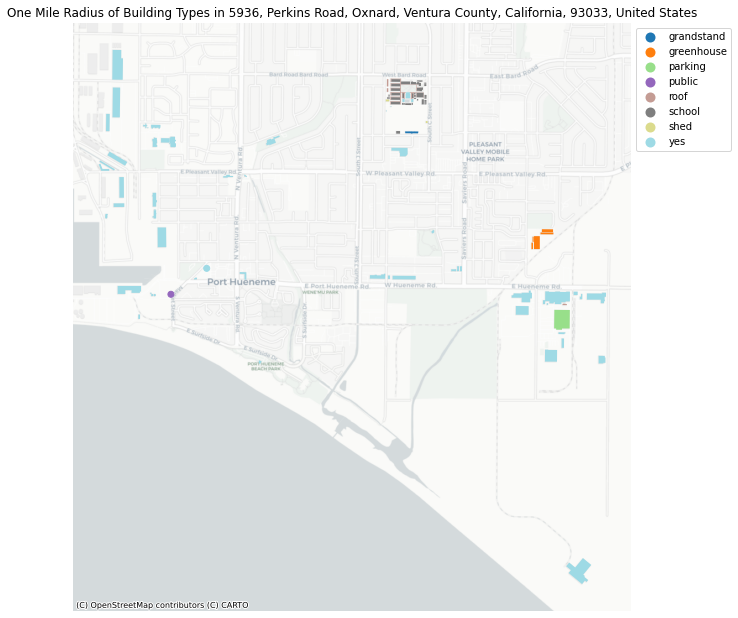

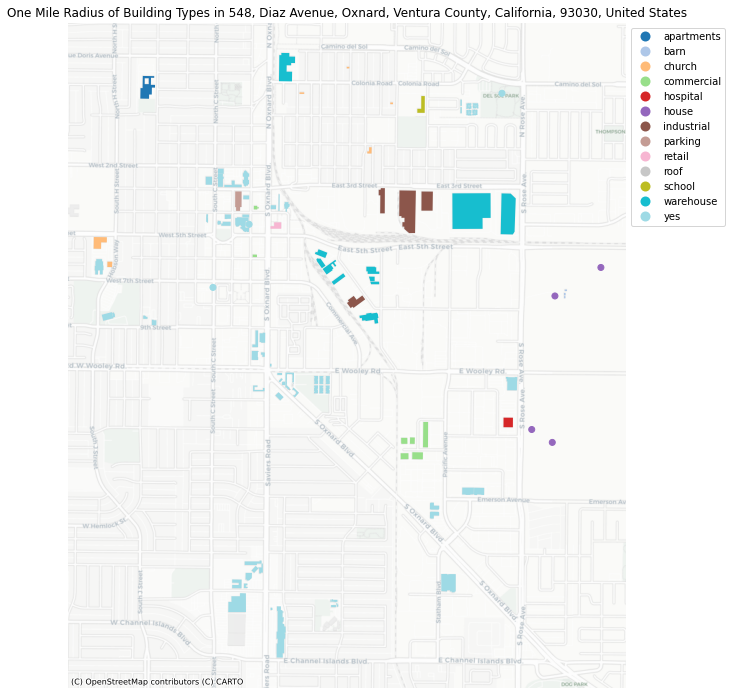

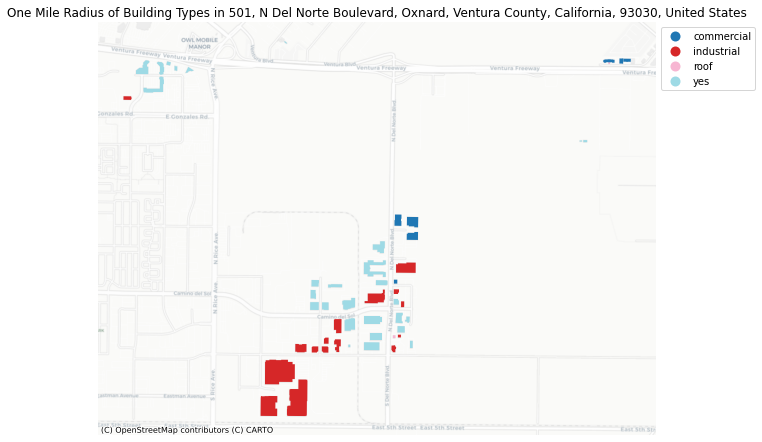

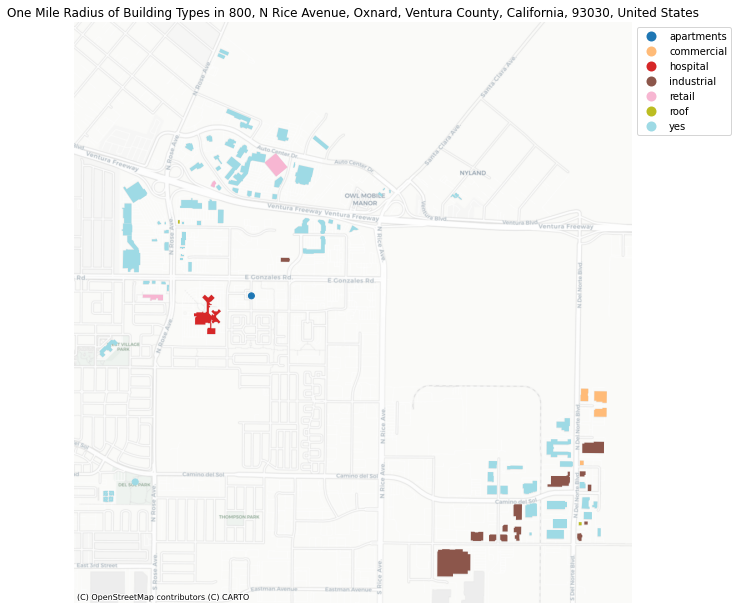

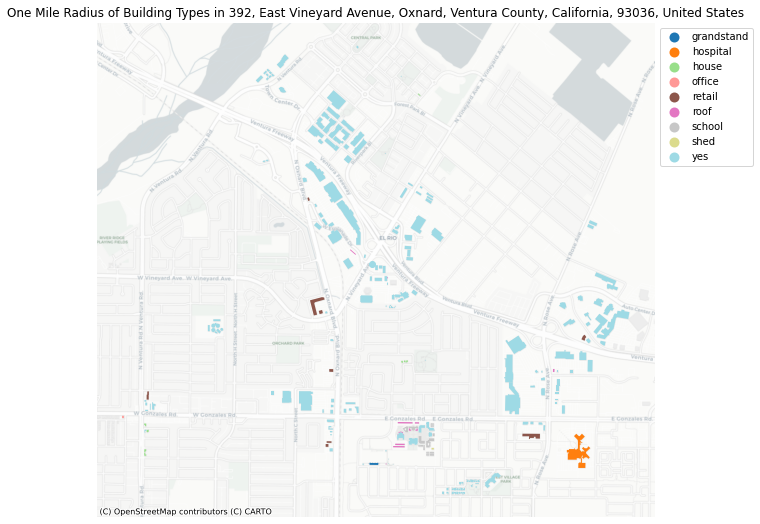

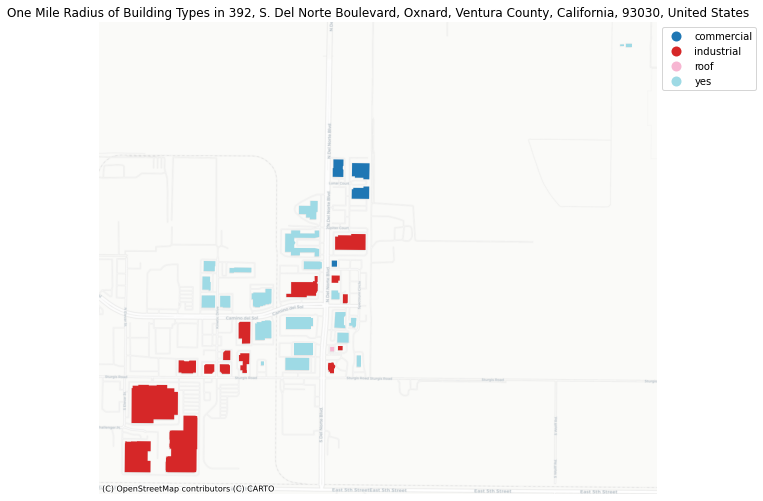

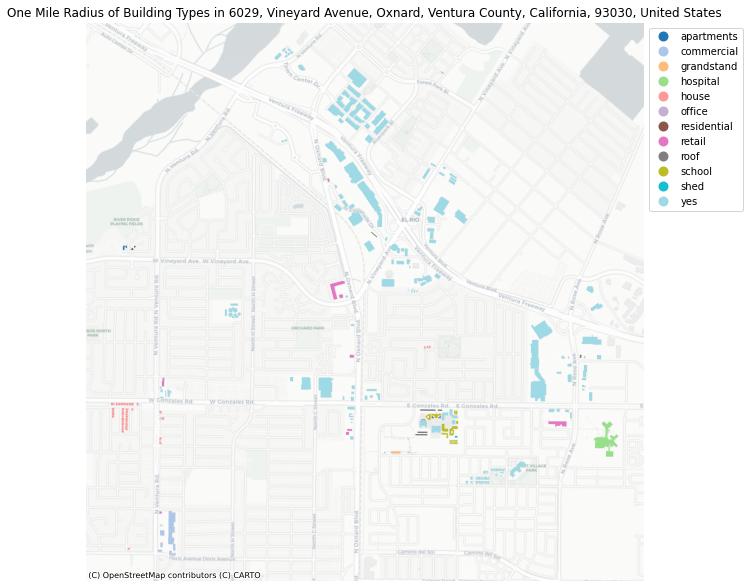

In [7]:
# see how long it takes this cell to run 
%%time

#make_building_map(address)
for address in address:
    make_building_map(address)

The function builds the map to show the types of buildings alittle over a mile of each facility in Oxnard, that had building type data availiable. We tried to symbol each facility on its respective map as a dot, but the loop placed all nine facilties on each map. Next steps are to put the facilities on the map, change each facility name as the title and not the street name, and zoom in closer on the building types without losing building type data. Trying to isolate just the residential, apartment and home building types further narrowed down the availiable data for each map, so broadening the building types allowed for more maps to be created without error. What we see, based on the current zoom scale, the facilities may not as close to the facilities as originally thought but still within a mile radius, which can concern the residents health. 

My partner, Lupe Velez, created a spatial autocorrelation map of the City of LA and it TRI facilities, since it had more facilities to analyze and interesting pattern of environmental justice and placement of facilities in low-income and racially diverse areas.